## Jean-Eudes Rouffiac  

&nbsp;

&nbsp;

# <center> TP 3 : sélection de modèles </center>

L'objectif de ce TP est double : 
* mise en œuvre d’une prodécude de sélection de modèle via le grid search
* prise en charge de données catégorielles


&nbsp;

# 1 Classification de données Splice

&nbsp;

&nbsp;

<p style="text-align:justify;"> Les données Splice sont des données de séquences d'ADN auxquelles l'ADN superflux est retiré durant le processus de création de protéines dans les organismes. Le problème que nous voulons résoudre est de reconnaître, pour une séquence d'ADN donnée, les frontières entre les exons et les introns.</p>

<p style="text-align:justify;">Chargeons dans un premier temps les données.</p>

&nbsp;

In [27]:
from sklearn.datasets import load_svmlight_file
import numpy as np

X, Y = load_svmlight_file("./splice")

&nbsp;

<p style="text-align:justify;"> On veut maintenant apprendre un modèle SVM non-linéaire avec un noyau RBF (gaussien) de paramètre $\gamma$ : $k(x, z) = exp(−\gamma \lVert x − z \rVert^2)$ en sélectionnant de façon optimal les hyper paramètres C du SVM et donc $\gamma$ du noyau. On se servira du module GridSearchCV.</p>

<p style="text-align:justify;">Dans un premier temps, on construit une échelle logarithmique les deux vecteurs suivants qui vont être les valeurs possibles que peuvent prendre C et $\gamma$.</p>

&nbsp;


In [10]:
gamma_grid = np.logspace(-3, 0, 30)
C_grid = np.logspace(-0.5, 1.5, 30)

&nbsp;

<p style="text-align:justify;"> On effectue alors une Grid Search sur la grille formée par les vecteurs précédemment définis.</p>

&nbsp;






In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# the grid
parameters = [{"gamma": gamma_grid, "C": C_grid}]
# the classifier
clf_rbf = SVC(kernel="rbf", tol=0.01)
# Perf a K-fold validation using the accuracy as the performance measure
K = 10 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_rbf = GridSearchCV(clf_rbf, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)

&nbsp;

Lançons la sélection du modèle optimal et son apprentissage

&nbsp;

In [12]:
clf_rbf.fit(X, Y)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   18.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   41.9s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  2.0min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed:  5.1min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed:  6.3min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 6046 tasks      | elapsed:  9.4min
[Parallel(n_jobs=2)]: Done 7196 tasks      | elapsed: 11.1min
[Parallel(n_jobs=2)]: Done 8446 tasks      | elapsed: 13.1min
[Parallel(n_jobs=2)]: Done 9000 out of 9000 | elapsed: 14.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.01, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'gamma': array([0.001  , 0.00127, 0.00161, 0.00204, 0.00259, 0.00329, 0.00418,
       0.0053 , 0.00672, 0.00853, 0.01083, 0.01374, 0.01743, 0.02212,
       0.02807, 0.03562, 0.0452 , 0.05736, 0.07279, 0.09237, 0.11721,
       0.14874, 0.18874, 0.2395 , 0.30392, 0.38566, 0.48939, 0.62102...  8.8772 , 10.40498, 12.1957 ,
       14.29461, 16.75475, 19.63828, 23.01807, 26.97954, 31.62278])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

&nbsp;

<p style="text-align:justify;">On trace le taux de classification en fonction de la grille d'hyper-paramètres.</p>

&nbsp;



 Rbf kernel - optimal hyper-parameters = {'C': 2.126112333899656, 'gamma': 0.01373823795883263}

 Rbf kernel - best cross-val accuracy = 0.886


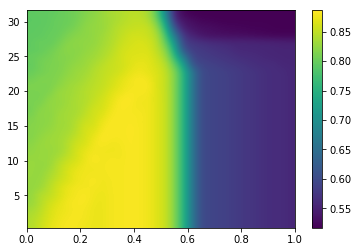

In [13]:
# Get the best parameters
print("\n Rbf kernel - optimal hyper-parameters = {}".format(clf_rbf.
best_params_))
print("\n Rbf kernel - best cross-val accuracy = {}".format(clf_rbf.
best_score_))
## Plot the validation performance w.r.t. C and gamma
import matplotlib.pyplot as plt
plt.imshow(clf_rbf.cv_results_["mean_test_score"].reshape(gamma_grid.
shape[0],C_grid.shape[0]), extent=[min(gamma_grid),max(gamma_grid),
min(C_grid),max(C_grid)],interpolation="bicubic",aspect="auto")
plt.colorbar()
plt.show()

&nbsp;

<p style="text-align:justify;">La figure obtenue est cohérente car la zone jaune correspond au meilleur score obtenu. On observe bien que pour $C=4.42$ et $\gamma = 0.01$, on est dans la zone jaune.</p>

<p style="text-align:justify;">On peut alors télécharger le jeux de données test et effectuer les prédictions dessus grâce à notre modèle.</p>

&nbsp;

In [14]:
# load the test set inputs (they are stored in a sparse matrix)
import scipy.sparse
Xtest = scipy.sparse.load_npz("./splice_t.npz")

In [22]:
import pandas as pd 

y_test = clf_rbf.predict(Xtest)
df = pd.DataFrame(y_test)
df.to_csv("y_test.csv", sep=';', header=False)

&nbsp;

<p style="text-align:justify;">On obtient alors un score de 90.39%.</p>

<p style="text-align:justify;">Nous voulons comparer ce résultat avec un SVM linéaire.</p>


&nbsp;

In [41]:
C_grid = [i/100 for i in range (1, 150)]
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# the grid
parameters = [{"C": C_grid}]
# the classifier
clf_lin = SVC(kernel="linear", tol=0.01)
# Perf a K-fold validation using the accuracy as the performance measure
K = 10 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_lin = GridSearchCV(clf_lin, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_lin.fit(X, Y)

Fitting 10 folds for each of 149 candidates, totalling 1490 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    4.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   22.2s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 1490 out of 1490 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.01, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.4...33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [42]:
# Get the best parameters
print("\n Linear kernel - optimal hyper-parameters = {}".format(clf_lin.best_params_))
print("\n Linear kernel - best cross-val accuracy = {}".format(clf_lin.best_score_))


 Linear kernel - optimal hyper-parameters = {'C': 0.01}

 Linear kernel - best cross-val accuracy = 0.819


In [43]:
y_test_lin = clf_lin.predict(Xtest)
df = pd.DataFrame(y_test_lin)
df.to_csv("y_test_lin.csv", sep=';', header=False)

&nbsp;

<p style="text-align:justify;">On obtient alors un score de 84.94%.</p>

<p style="text-align:justify;">Comparons ces deux méthodes avec un test de Mc Nemar.</p>


&nbsp;

&nbsp;

# 2. Classification de données marketting

&nbsp;

&nbsp;

<p style="text-align:justify;">Les données à traiter portent sur une campagne de marketing (par téléphone) d’une banque à destination de prospects. L’objectif est de prédire si un prospect va souscrire ou non à l’ouverture d’un compte.</p>

<p style="text-align:justify;">Import des librairies utiles.</p>

&nbsp;

In [73]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import linear_model
from sklearn.svm import SVC

&nbsp;

## 2.1 Chargement des données et analyse sommaire

&nbsp;

In [74]:
data = pd.read_csv("./bank-additional-full.csv", sep=";",header=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

&nbsp;

<p style="text-align:justify;">On remarque qu'il y a des variables de type object, elles sont donc catégorielles. Il n'y a pas de valeurs manquantes.</p>

<p style="text-align:justify;">Visualisation des variables catégorielles et numériques.</p>
&nbsp;


In [75]:
# variables numeriques
var_num = list(data.columns[(data.dtypes=="int")|(data.dtypes=="float")])
print("\n On a {} variables numeriques : \n {} ".format(len(var_num),var_num))
# Variables categorielles
var_cat = list(data.columns[data.dtypes=="object"].drop("y"))
print("\n On a {} variables categorielles : \n {} ".format(len(var_cat),var_cat))


 On a 10 variables numeriques : 
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'] 

 On a 10 variables categorielles : 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'] 


&nbsp;

<p style="text-align:justify;">Analyse statistique et sommaire des données à disposition en fonction des catégories.</p>

&nbsp;



 Categories une des variables ['married' 'single' 'divorced' 'unknown']

 Analyse statistique selon la variable marital
Moyenne
                age    duration  campaign       pdays  previous  emp.var.rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
marital                                                          
divorced       93.606563     -40.707069   3.715603  5170.878643  
married        93.597367     -40.270659   3.745832  5171.848772  
single         93.517300     -40.918698   3.317447  5155.199265  
unknown        93.471250     -40.820000   3.313037  51

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


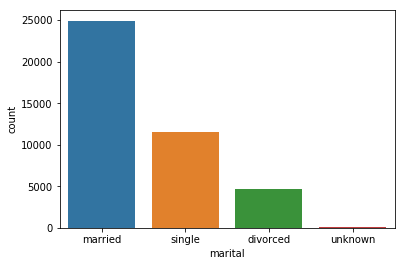

In [76]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["marital"].unique()))
plt.figure()
sb.countplot(x = "marital", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable marital")
print("Moyenne")
print(data.groupby("marital").mean())
print("Variance")
print(data.groupby("marital").var())


 Categories une des variables ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

 Analyse statistique selon la variable marital
Moyenne
                           age    duration  campaign       pdays  previous  \
education                                                                    
basic.4y             47.596504  264.827826  2.600575  965.704981  0.147031   
basic.6y             40.448953  264.414485  2.556283  980.368237  0.129145   
basic.9y             39.061208  261.291811  2.532341  979.133168  0.141439   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                 

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


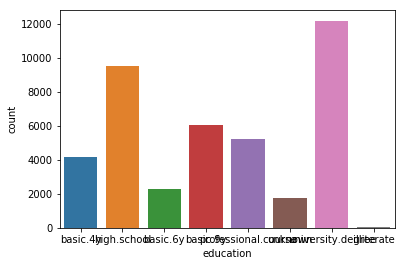

In [77]:
# Examen une des variables categorielles
print("\n Categories une des variables {}".format(data["education"].unique()))
plt.figure()
sb.countplot(x = "education", data = data)
# analyse statistique selon la variable categorielle
print("\n Analyse statistique selon la variable marital")
print("Moyenne")
print(data.groupby("education").mean())
print("Variance")
print(data.groupby("education").var())

&nbsp;

<p style="text-align:justify;">On peut remarquer que les données ont des ordres de grandeur de valeurs différentes donc il sera nécessaire de les normaliser.</p>

&nbsp;

In [78]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


&nbsp;

<p style="text-align:justify;">Les deux classes sont de tailles très différentes puisque il y a 36548 pour la modalité "no" et 4640 pour la modalité "yes".</p>

&nbsp;

&nbsp;

## 2.2 Encodage des variables catégorielles

&nbsp;

&nbsp;

<p style="text-align:justify;">Il n’est pas pratique de mettre en oeuvre des algorithmes de classification de type SVM ou
régression logistique sur des variables catégorielles. Il convient de les transformer en valeur numérique. Pour cela nous utilisons le principe du one hot encoding.</p>

&nbsp;



In [79]:
#%% encoder les labels en utilisant la classe LabelEncoder() de scikit pour avoir des labels numeriques

# encodeur
encode_lab = LabelEncoder()
# encoder d abord les labels en 0 - 1
data["y"] = encode_lab.fit_transform(data["y"].values)
# encoder en hot-encoding les autres variables categorielles
print("Avant one-hot encoding")
print(data.columns)
print(data.shape)
# encodage
data = pd.get_dummies(data, columns=var_cat)
print("Apres one-hot encoding")
print(data.columns)
print(data.shape)

Avant one-hot encoding
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
(41188, 21)
Apres one-hot encoding
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_univers

&nbsp;

<p style="text-align:justify;">On obtient alors un nombre de colonnes égales aux colonnes numériques + la somme des modalités des variables catégorielles.</p>

&nbsp;

&nbsp;

## 2.3 Réalisation de la classification

&nbsp;

In [295]:
Y = data["y"].values
X = data.drop("y", axis=1).values

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

&nbsp;

### LDA & QDA

<p style="text-align:justify;"></p>

&nbsp;

In [297]:
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=0.4, stratify=Y)

In [298]:
sc = StandardScaler()
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [299]:
# LDA
clf_lda = LinearDiscriminantAnalysis(solver='svd', store_covariance = False)
clf_lda.fit(Xa, Ya)
Y_lda = clf_lda.predict(Xa)
err_lda = sum(Y_lda != Ya)/Ya.size
print('LDA : taux d''erreur apprentissage = {}%'.format(100*err_lda))
Y_ldat = clf_lda.predict(Xt)
err_ldat = sum(Y_ldat != Yt)/Yt.size
print('LDA : taux d''erreur test= {}%'.format(100*err_ldat))

print('\n \n')
# QDA
clf_qda = QuadraticDiscriminantAnalysis(store_covariance = False)
clf_qda.fit(Xa, Ya)
Y_qda = clf_qda.predict(Xa)
err_qda = sum(Y_qda!= Ya)/Ya.size
print('QDA : taux d''erreur apprentissage = {}%'.format(100*err_qda))
Y_qdat = clf_qda.predict(Xt)
err_qdat = sum(Y_qdat!= Yt)/Yt.size
print('QDA : taux d''erreur test = {}%'.format(100*err_qdat))

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA : taux derreur apprentissage = 9.145354483651667%
LDA : taux derreur test= 8.806749210973537%

 



/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA : taux derreur apprentissage = 54.63742311427646%
QDA : taux derreur test = 54.97693614955086%


&nbsp;

### Regression logistique

<p style="text-align:justify;"></p>

&nbsp;

In [99]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.3, stratify=Y)

# les donnees app sont ensuite re-decoupees en app et validation (proportion au choix)
#Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.3, stratify=Ya)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
#Xv = sc.transform(Xv)
Xt = sc.transform(Xt)

In [104]:
C_grid = np.logspace(-1, 1, 50)
#C_grid = [i/100 for i in range (1, 150)]
from sklearn.model_selection import GridSearchCV
# the grid
parameters = [{"C": C_grid}]
# the classifier
clf_reg = linear_model.LogisticRegression(tol=1e-5, multi_class='multinomial', solver='lbfgs')
# Perf a K-fold validation using the accuracy as the performance measure
K = 10 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_reg = GridSearchCV(clf_reg, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_reg.fit(Xa, Ya)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   16.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  2.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-05, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': array([ 0.1    ,  0.10985,  0.12068,  0.13257,  0.14563,  0.15999,
        0.17575,  0.19307,  0.2121 ,  0.233  ,  0.25595,  0.28118,
        0.30888,  0.33932,  0.37276,  0.40949,  0.44984,  0.49417,
        0.54287,  0.59636,  0.65513,  0.71969,  0.7906 ,  0.86851,
        0.9541...87,
        5.17947,  5.68987,  6.25055,  6.86649,  7.54312,  8.28643,
        9.10298, 10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [108]:
# Get the best parameters
print("\nRegression logistique - optimal hyper-parameters = {}".format(clf_reg.best_params_))
print("Regression logistique - best cross-val accuracy = {} \n".format(clf_reg.best_score_))

y_app_reg = clf_reg.predict(Xa)
err_app_reg = sum(y_app_reg != Ya)/Ya.size
print('Regression logistique : taux d''erreur apprentissage = {}%'.format(100*err_app_reg))

y_test_reg = clf_reg.predict(Xt)
err_test_reg = sum(y_test_reg != Yt)/Yt.size
print('Regression logistique : taux d''erreur test = {}%'.format(100*err_test_reg))


Regression logistique - optimal hyper-parameters = {'C': 1.8420699693267153}
Regression logistique - best cross-val accuracy = 0.9108598383684229 

Regression logistique : taux derreur apprentissage = 8.879331275363324%
Regression logistique : taux derreur test = 8.8451889617221%


&nbsp;

### SVM linéaire

<p style="text-align:justify;"></p>

&nbsp;

In [303]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.5, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [304]:
C_grid = np.logspace(-1, 1, 7)
#C_grid = [i/100 for i in range (1, 150)]
from sklearn.model_selection import GridSearchCV
# the grid
parameters = [{"C": C_grid}]
# the classifier
clf_svm_lin = SVC(kernel='linear', probability=True)
# Perf a K-fold validation using the accuracy as the performance measure
K = 5 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_svm_lin = GridSearchCV(clf_svm_lin, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_svm_lin.fit(Xa, Ya)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=2)]: Done  35 out of  35 | elapsed: 52.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'C': array([ 0.1    ,  0.21544,  0.46416,  1.     ,  2.15443,  4.64159,
       10.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [305]:
# Get the best parameters
print("\nSVM linéaire - optimal hyper-parameters = {}".format(clf_svm_lin.best_params_))
print("SVM linéaire - best cross-val accuracy = {} \n".format(clf_svm_lin.best_score_))

y_app_svm_lin = clf_reg.predict(Xa)
err_app_svm_lin = sum(y_app_svm_lin != Ya)/Ya.size
print('SVM linéaire : taux d''erreur apprentissage = {}%'.format(100*err_app_svm_lin))

y_test_svm_lin = clf_svm_lin.predict(Xt)
err_test_svm_lin = sum(y_test_svm_lin != Yt)/Yt.size
print('SVM linéaire : taux d''erreur test = {}%'.format(100*err_test_svm_lin))



SVM linéaire - optimal hyper-parameters = {'C': 0.46415888336127786}
SVM linéaire - best cross-val accuracy = 0.9019131785957075 

SVM linéaire : taux derreur apprentissage = 8.973487423521414%
SVM linéaire : taux derreur test = 9.517335146159075%


&nbsp;

### SVM non linéaire

<p style="text-align:justify;"></p>

&nbsp;

In [315]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.7, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [316]:
gamma_grid = np.logspace(-1.5, 0, 3)
C_grid = np.logspace(-1, 1.5, 3)

In [317]:
# the grid
parameters = [{"gamma": gamma_grid, "C": C_grid}]
# the classifier
clf_svm_rbf = SVC(kernel="rbf", tol=0.01, cache_size = 1000, probability=True)
# Perf a K-fold validation using the accuracy as the performance measure
K = 3 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_svm_rbf = GridSearchCV(clf_svm_rbf, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_svm_rbf.fit(Xa, Ya)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed: 10.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.01, verbose=False),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'gamma': array([0.03162, 0.17783, 1.     ]), 'C': array([ 0.1    ,  1.77828, 31.62278])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [318]:
# Get the best parameters
print("\nSVM non linéaire - optimal hyper-parameters = {}".format(clf_svm_rbf.best_params_))
print("SVM non linéaire - best cross-val accuracy = {} \n".format(clf_svm_rbf.best_score_))

y_app_svm_rbf = clf_reg.predict(Xa)
err_app_svm_rbf = sum(y_app_svm_rbf != Ya)/Ya.size
print('SVM non linéaire : taux d''erreur apprentissage = {}%'.format(100*err_app_svm_rbf))

y_test_svm_rbf = clf_svm_rbf.predict(Xt)
err_test_svm_rbf = sum(y_test_svm_rbf != Yt)/Yt.size
print('SVM non linéaire : taux d''erreur test = {}%'.format(100*err_test_svm_rbf))


SVM non linéaire - optimal hyper-parameters = {'C': 1.7782794100389228, 'gamma': 0.03162277660168379}
SVM non linéaire - best cross-val accuracy = 0.8987536419553254 

SVM non linéaire : taux derreur apprentissage = 8.983489802525089%
SVM non linéaire : taux derreur test = 9.732241953385127%


&nbsp;

### K plus proches voisins

<p style="text-align:justify;"></p>

&nbsp;

In [151]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.4, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [157]:
from sklearn.neighbors import KNeighborsClassifier
k_values = [k for k in range(2,10)]
# the grid
parameters = [{"n_neighbors": k_values}]
# the classifier
clf_knn = KNeighborsClassifier()
# Perf a K-fold validation using the accuracy as the performance measure
K = 5 # feel free to adapt the value of $K$
# we will dot it on a grid search using n_jobs processors
clf_knn = GridSearchCV(clf_knn, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_knn.fit(Xa, Ya)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=2)]: Done  40 out of  40 | elapsed: 17.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=2,
       param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [158]:
# Get the best parameters
print("\nKNN - optimal hyper-parameters = {}".format(clf_knn.best_params_))
print("KNN - best cross-val accuracy = {} \n".format(clf_knn.best_score_))

y_app_knn = clf_knn.predict(Xa)
err_app_knn = sum(y_app_knn != Ya)/Ya.size
print('KNN : taux d''erreur apprentissage = {}%'.format(100*err_app_knn))

y_test_knn = clf_knn.predict(Xt)
err_test_knn = sum(y_test_knn != Yt)/Yt.size
print('KNN : taux d''erreur test = {}%'.format(100*err_test_knn))


KNN - optimal hyper-parameters = {'n_neighbors': 9}
KNN - best cross-val accuracy = 0.8972159274846229 

KNN : taux derreur apprentissage = 9.015862738750405%
KNN : taux derreur test = 10.378732702112163%


&nbsp;

## Comparaison des modèles

<p style="text-align:justify;">On split de nouveau les variables pour séléctionner un échantillon test sur lesquelles nous allons faire des prédictions avec les modèles entraînés. On pourrait l'appliquer sur toutes les variables mais le temps de calcul est trop long...</p>

&nbsp;

In [319]:
# decoupage des donnees initiales en app et test (proportion a choisir)
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size =0.4, stratify=Y)

#Normaliser les données
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa = sc.transform(Xa)
Xt = sc.transform(Xt)

In [320]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import scipy.io as sio
from sklearn.metrics import accuracy_score, roc_curve

Y_ldat = clf_lda.predict(Xt)
Y_qdat = clf_qda.predict(Xt)
y_test_reg = clf_reg.predict(Xt)
y_test_svm_lin = clf_svm_lin.predict(Xt)
y_test_svm_rbf = clf_svm_rbf.predict(Xt)
y_test_knn = clf_knn.predict(Xt)


# matrices de confusion
confmat1 = confusion_matrix(y_true=Yt, y_pred=Y_ldat)
confmat2 = confusion_matrix(y_true=Yt, y_pred=Y_qdat)
confmat3 = confusion_matrix(y_true=Yt, y_pred=y_test_reg)
confmat4 = confusion_matrix(y_true=Yt, y_pred=y_test_svm_lin)
confmat5 = confusion_matrix(y_true=Yt, y_pred=y_test_svm_rbf)
confmat6 = confusion_matrix(y_true=Yt, y_pred=y_test_knn)

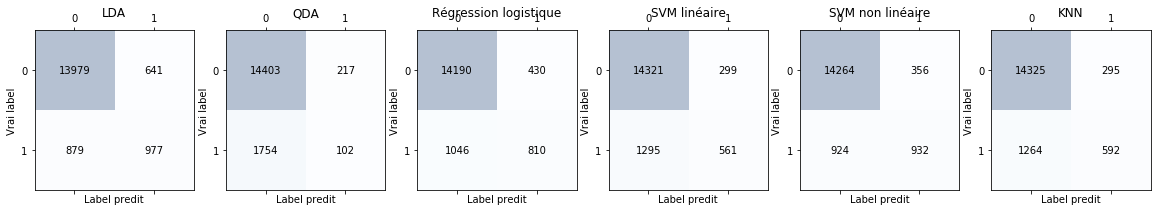

,LDA,QDA,Reg. Log,SVM lin,SVM non lin,KNN
Accuracy,0.907745,0.880371,0.910415,0.903253,0.922311,0.905378
Precision,0.603832,0.319749,0.653226,0.652326,0.723602,0.667418
Recall,0.526401,0.054957,0.436422,0.302263,0.502155,0.318966
F-mesure,0.562464,0.523256,0.523256,0.413108,0.592875,0.431644


In [321]:

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6,figsize=(20,15))

ax1.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
ax2.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
ax3.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)
ax4.matshow(confmat4, cmap=plt.cm.Blues, alpha=0.3)
ax5.matshow(confmat5, cmap=plt.cm.Blues, alpha=0.3)
ax6.matshow(confmat6, cmap=plt.cm.Blues, alpha=0.3)

for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax1.text(x=j, y=i, s=confmat1[i, j], va="center", ha="center")
ax1.set(xlabel='Label predit', ylabel='Vrai label')
ax1.set_title('LDA')

for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax2.text(x=j, y=i, s=confmat2[i, j], va="center", ha="center")
ax2.set(xlabel='Label predit', ylabel='Vrai label')
ax2.set_title('QDA')

for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax3.text(x=j, y=i, s=confmat3[i, j], va="center", ha="center")
ax3.set(xlabel='Label predit', ylabel='Vrai label')
ax3.set_title('Régression logistique')

for i in range(confmat4.shape[0]):
    for j in range(confmat4.shape[1]):
        ax4.text(x=j, y=i, s=confmat4[i, j], va="center", ha="center")
ax4.set(xlabel='Label predit', ylabel='Vrai label')
ax4.set_title('SVM linéaire')

for i in range(confmat5.shape[0]):
    for j in range(confmat5.shape[1]):
        ax5.text(x=j, y=i, s=confmat5[i, j], va="center", ha="center")
ax5.set(xlabel='Label predit', ylabel='Vrai label')
ax5.set_title('SVM non linéaire')

for i in range(confmat6.shape[0]):
    for j in range(confmat6.shape[1]):
        ax6.text(x=j, y=i, s=confmat6[i, j], va="center", ha="center")
ax6.set(xlabel='Label predit', ylabel='Vrai label')
ax6.set_title('KNN')

plt.show()

import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

# accuracy: (tp + tn) / (p + n)
# precision tp / (tp + fp)
# recall: tp / (tp + fn)
# f1: 2 tp / (2 tp + fp + fn)

accuracy_lda = accuracy_score(Yt, Y_ldat)
precision_lda = precision_score(Yt, Y_ldat)
recall_lda = recall_score(Yt, Y_ldat)
f1_lda = f1_score(Yt, Y_ldat)

accuracy_qda = accuracy_score(Yt, Y_qdat)
precision_qda = precision_score(Yt, Y_qdat)
recall_qda = recall_score(Yt, Y_qdat)
f1_qda = f1_score(Yt, Y_qdat)

accuracy_reg = accuracy_score(Yt, y_test_reg)
precision_reg = precision_score(Yt, y_test_reg)
recall_reg = recall_score(Yt, y_test_reg)
f1_reg = f1_score(Yt, y_test_reg)

accuracy_svn_lin = accuracy_score(Yt, y_test_svm_lin)
precision_svn_lin = precision_score(Yt, y_test_svm_lin)
recall_svn_lin = recall_score(Yt, y_test_svm_lin)
f1_svn_lin = f1_score(Yt, y_test_svm_lin)

accuracy_svn_rbf = accuracy_score(Yt, y_test_svm_rbf)
precision_svn_rbf = precision_score(Yt, y_test_svm_rbf)
recall_svn_rbf = recall_score(Yt, y_test_svm_rbf)
f1_svn_rbf = f1_score(Yt, y_test_svm_rbf)

accuracy_knn = accuracy_score(Yt, y_test_knn)
precision_knn = precision_score(Yt, y_test_knn)
recall_knn = recall_score(Yt, y_test_knn)
f1_knn = f1_score(Yt, y_test_knn)

resultats = {'LDA':[accuracy_lda, precision_lda, recall_lda, f1_lda],
        'QDA':[accuracy_qda, precision_qda, recall_qda, f1_reg],
        'Reg. Log':[accuracy_reg, precision_reg, recall_reg, f1_reg],
        'SVM lin':[accuracy_svn_lin, precision_svn_lin, recall_svn_lin, f1_svn_lin], 
        'SVM non lin':[accuracy_svn_rbf, precision_svn_rbf, recall_svn_rbf, f1_svn_rbf], 
        'KNN':[accuracy_knn, precision_knn, recall_knn, f1_knn]}

df_res = pd.DataFrame(resultats, index= ['Accuracy', 'Precision', 'Recall', 'F-mesure'])
df_res

0


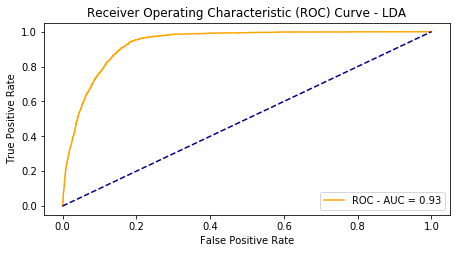

1


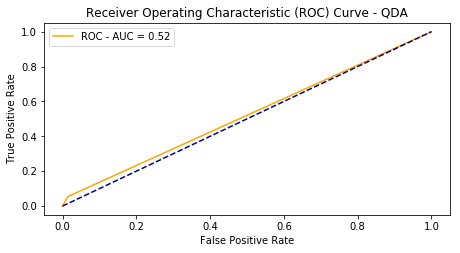

2


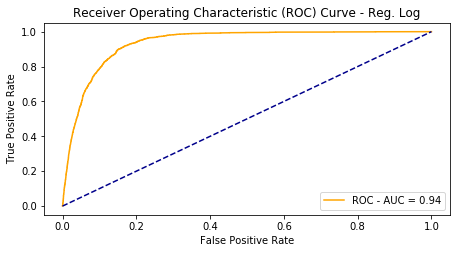

3


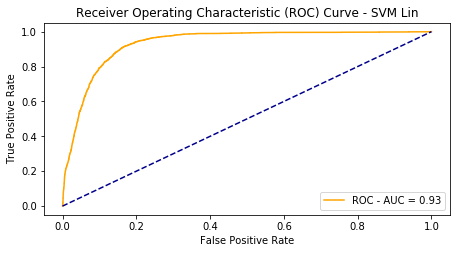

4


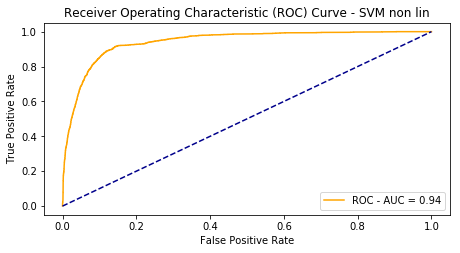

5


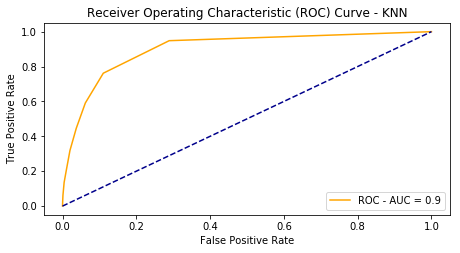

In [324]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def plot_roc_curve(fpr, tpr, AUC, modele):
    plt.plot(fpr, tpr, color='orange', label='ROC - AUC = ' + str(round(AUC,2)))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - ' + modele)
    plt.legend()
    plt.show()

Y_ldat_proba = clf_lda.predict_proba(Xt)
Y_qdat_proba = clf_qda.predict_proba(Xt)
y_test_reg_proba = clf_reg.predict_proba(Xt)
y_test_svm_lin_proba = clf_svm_lin.predict_proba(Xt)
y_test_svm_rbf_proba = clf_svm_rbf.predict_proba(Xt)
y_test_knn_proba = clf_knn.predict_proba(Xt)

modele = ["LDA", "QDA", "Reg. Log", "SVM Lin", "SVM non lin", "KNN"]
res = [Y_ldat_proba[:,1], Y_qdat_proba[:,1], y_test_reg_proba[:,1], y_test_svm_lin_proba[:,1], y_test_svm_rbf_proba[:,1], y_test_knn_proba[:,1]]

for i, nom_modele in enumerate(modele): 
    print(i)
    auc = metrics.roc_auc_score(Yt, res[i])    
    fpr, tpr, thresholds = roc_curve(Yt, res[i])
    plt.figure(figsize=(16, 12))
    plt.subplot(3,2,i+1)
    plot_roc_curve(fpr, tpr, auc, nom_modele)

&nbsp;

<p style="text-align:justify;">Nous allons comparer les modèles LDA, regréssion logistique et SVM non linéaire.</p>

&nbsp;

In [328]:
from sklearn.metrics.cluster import contingency_matrix
from statsmodels.stats.contingency_tables import mcnemar 

TC_LDA_REGLOG = contingency_matrix(Y_ldat, y_test_reg )
TC_LDA_SVM_NL = contingency_matrix(Y_ldat, y_test_svm_rbf )
TC_REGLOG_SVM_NL = contingency_matrix(y_test_reg, y_test_svm_rbf )

result_LDA_REGLOG = mcnemar(TC_LDA_REGLOG, exact=True)
result_LDA_SVM_NL = mcnemar(TC_LDA_SVM_NL, exact=True)
result_REGLOG_SVM_NL = mcnemar(TC_REGLOG_SVM_NL, exact=True)

resultats = {'LDA / Reg. log':[result_LDA_REGLOG.statistic, result_LDA_REGLOG.pvalue],
        'LDA / SVM non lin':[result_LDA_SVM_NL.statistic, result_LDA_SVM_NL.pvalue],
        'Reg. Log / SVM non lin':[result_REGLOG_SVM_NL.statistic, result_REGLOG_SVM_NL.pvalue]}

df_res = pd.DataFrame(resultats, index= ['Statistic', 'p-value'])
df_res

,LDA / Reg. log,LDA / SVM non lin,Reg. Log / SVM non lin
Statistic,2.300000e+01,3.590000e+02,446.000000
p-value,2.772643e-90,1.200867e-24,0.125238
